0.21428571428571427


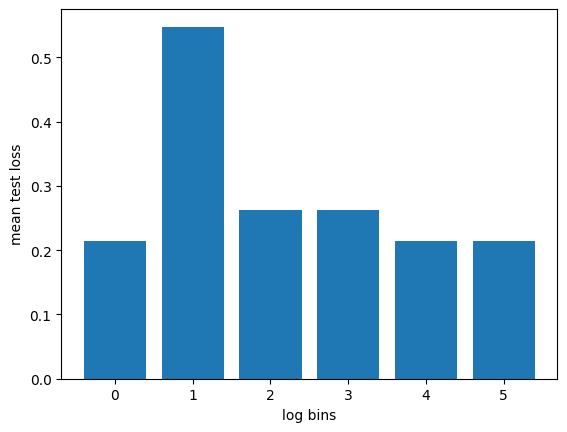

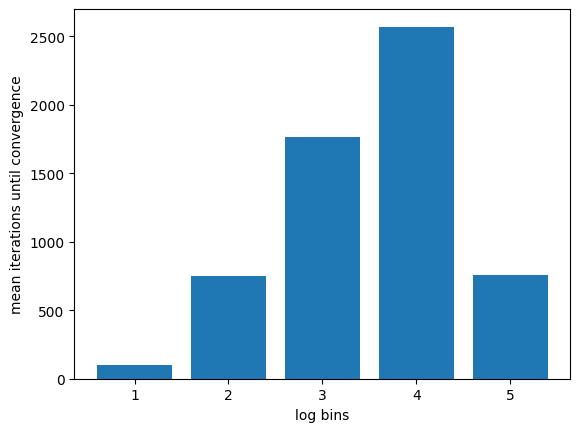

[514]


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))
"""
#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
"""
#loading sonar data
sonar_data = pd.read_csv("sonar.csv").to_numpy()
sonar_x = sonar_data[:,:-1]
sonar_x = scaler.fit_transform(sonar_x)
#add intercept
bias = np.ones((sonar_data.shape[0],1))
sonar_x = np.hstack((bias, sonar_x)).astype(float)
sonar_y = sonar_data[:,-1]
#convert labels to +1 -1
sonar_y = np.where(sonar_y == "M",1,-1)

bins = [1,2,3,4,5]

normal_iters, quant_iters,  w_quant, w = experiment(sonar_x,sonar_y, bins)
print(normal_iters)

In [16]:
from QuantLog import quantlogistic
from NormalLog import normallogistic

#generate random w to test gradient func on
w_test = np.random.rand(sonar_x.shape[1]) *2 -1

loss, ng = normallogistic(w_test,sonar_x.T,sonar_y.T)
loss, qg1 = quantlogistic(w_test,sonar_x.T,sonar_y.T,1)
loss, qg2 = quantlogistic(w_test,sonar_x.T,sonar_y.T,2)
loss, qg3 = quantlogistic(w_test,sonar_x.T,sonar_y.T,3)
loss, qg4 = quantlogistic(w_test,sonar_x.T,sonar_y.T,4)
loss, qg5 = quantlogistic(w_test,sonar_x.T,sonar_y.T,5)

grads = (qg1,qg2,qg3,qg4,qg5)

gradients = np.hstack((ng,qg1,qg2,qg3,qg4,qg5))
print(gradients)

# the left col is the actual gradient, the 3 to the right are the gradients for 2,4,and 8 quantization levels 
# according to the scheme in QuantLog.py

[[-0.31063501 -0.03995621 -0.26949023 -0.30368699 -0.30925102 -0.31097156]
 [ 0.17775725 -0.02679463  0.14803163  0.17086873  0.17597397  0.17747457]
 [ 0.21106399 -0.00900513  0.17958731  0.20526201  0.20951891  0.21076648]
 [ 0.22396494  0.0021002   0.19147985  0.21783957  0.2225268   0.22366103]
 [ 0.22975647  0.00065865  0.19565433  0.22307403  0.22809861  0.2294428 ]
 [ 0.18876489 -0.00873301  0.15725977  0.18192752  0.1872167   0.18843718]
 [ 0.14664833 -0.00340825  0.12153191  0.14215412  0.14506882  0.14669326]
 [ 0.10388669 -0.00727486  0.08700449  0.10215681  0.10307548  0.10418381]
 [ 0.11518924 -0.02233143  0.0943913   0.11402754  0.11409837  0.11539515]
 [ 0.11263984 -0.04342346  0.09262261  0.1107978   0.11139692  0.11257962]
 [ 0.09550091 -0.05489575  0.0759552   0.09256725  0.09332287  0.09489452]
 [ 0.07075801 -0.0727702   0.05043258  0.06790155  0.0684339   0.07006641]
 [ 0.05370229 -0.07466612  0.03352493  0.0505414   0.05150401  0.05306519]
 [ 0.0465049  -0.05899317

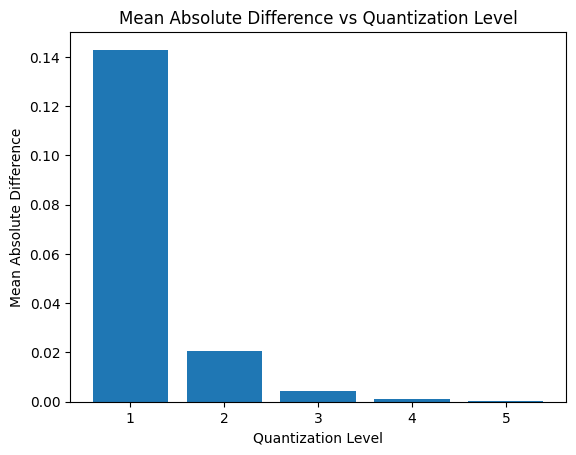

In [32]:
# plot average error of quantization for each feature

import matplotlib.pyplot as plt
quant_lvl = [1,2,3,4,5]
vals = []

for grad in grads:

    vals.append(np.mean(np.abs(ng - grad)))

plt.bar(quant_lvl,vals)
plt.xlabel('Quantization Level')
plt.ylabel('Mean Absolute Difference')
plt.title('Mean Absolute Difference vs Quantization Level')
plt.show()

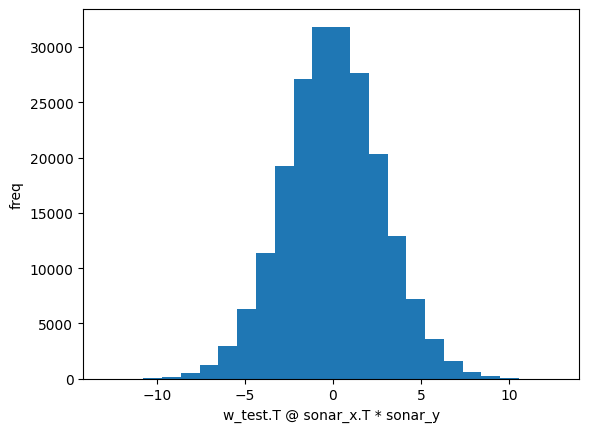

In [42]:
#plot the distribution of vals that were quantized
vals = []
for i in range(1000):
    w_test = np.random.rand(sonar_x.shape[1]) *2 -1
    vals.extend((w_test.T @ sonar_x.T ) * sonar_y)

plt.hist(vals,bins = 24)
plt.xlabel("w_test.T @ sonar_x.T * sonar_y")
plt.ylabel("freq")
plt.show()

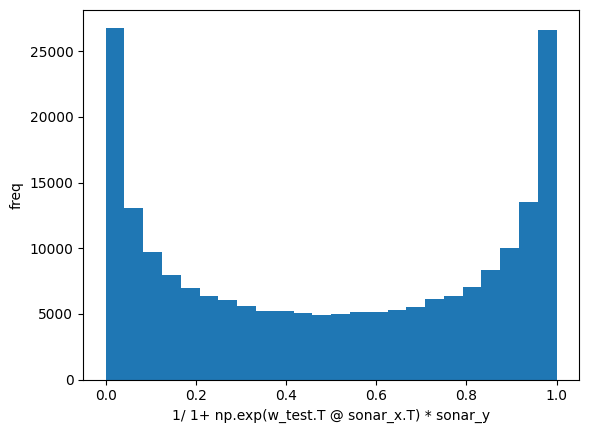

In [43]:
# plot of the gradient function of the values, idk what to call them is highly skewed and I think could result in
# a bad quantization
# although this was just for one random test point so it is not necesarily a good example, but it very much looks
# like you would expect it to
f_vals = []
for i in range(1000):
    w_test = np.random.rand(sonar_x.shape[1]) *2 -1
    vals = (w_test.T @ sonar_x.T) * sonar_y
    f_vals.extend(1/(1+np.exp(vals)))

plt.hist(f_vals,bins = 24)
plt.xlabel("1/ 1+ np.exp(w_test.T @ sonar_x.T) * sonar_y")
plt.ylabel("freq")
plt.show()